In [1]:
import pandas as pd
import matplotlib.pylab as plt
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt

In [2]:
!pip install statsmodels

In [3]:
airseries = pd.read_csv("/Users/shubhrasaxena/Downloads/AirPassengers.csv",header = 0)

In [4]:
airseries.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
airseries.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [6]:
# create a new DataFrame containing only the rows where the year is 1960
df_1960 = airseries[airseries['Month'].str.startswith('1960')]
print(df_1960)


       Month  #Passengers
132  1960-01          417
133  1960-02          391
134  1960-03          419
135  1960-04          461
136  1960-05          472
137  1960-06          535
138  1960-07          622
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432


In [7]:
#changing the name of column
airseries.rename(columns = {'#Passengers':'Passengers'}, inplace = True)


In [8]:
print(airseries)

       Month  Passengers
0    1949-01         112
1    1949-02         118
2    1949-03         132
3    1949-04         129
4    1949-05         121
..       ...         ...
139  1960-08         606
140  1960-09         508
141  1960-10         461
142  1960-11         390
143  1960-12         432

[144 rows x 2 columns]


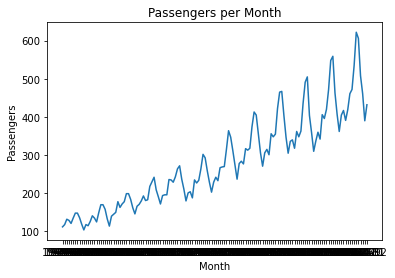

In [9]:
# extract the Month and #Passengers columns from the DataFrame
months = airseries['Month']
passengers = airseries['Passengers']

# create a line chart with the entire dataset
plt.plot(months, passengers)
plt.title('Passengers per Month')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.show()

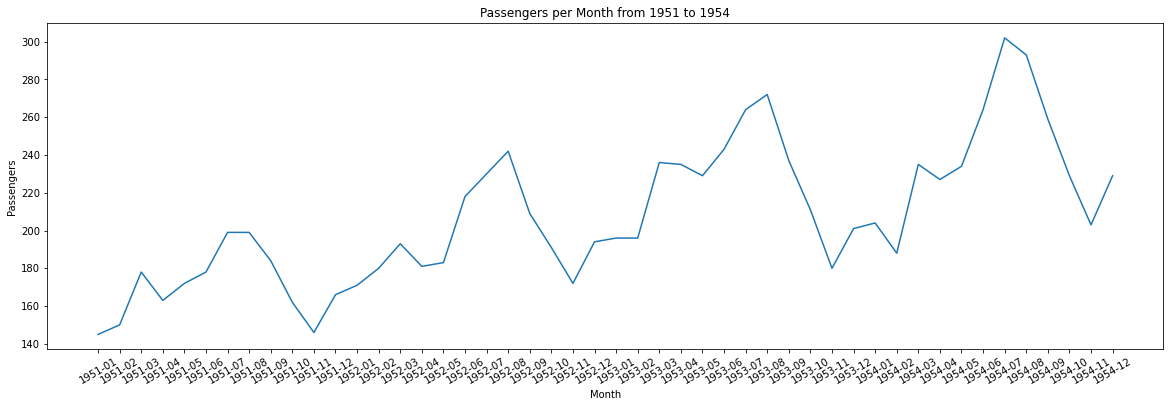

In [10]:
# filter the DataFrame to only include data from 1951 to 1954
df_subset = airseries[(airseries['Month'] >= '1951-01') & (airseries['Month'] <= '1954-12')]

# extract the Month and Passengers columns from the subset DataFrame
months = df_subset['Month']
passengers = df_subset['Passengers']

# create a line chart with the subset data
fig = plt.figure(figsize=(20, 6))
plt.plot(months, passengers)
plt.title('Passengers per Month from 1951 to 1954')
plt.xticks(rotation = 30)
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.show()

# MOVING AVERAGE METHOD


In [11]:
#rolling average transform on first 50 observations

rollingseries = airseries[0:50].rolling(window = 10)
rollingmean = rollingseries.mean()
print(rollingmean.head(15))

    Passengers
0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9        129.8
10       129.0
11       129.0
12       127.3
13       127.0
14       129.0


/var/folders/dr/slp8j4md10ld1wd0fy8f76j40000gn/T/ipykernel_37551/1909557047.py:4: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Month'], dtype='object')
  rollingmean = rollingseries.mean()


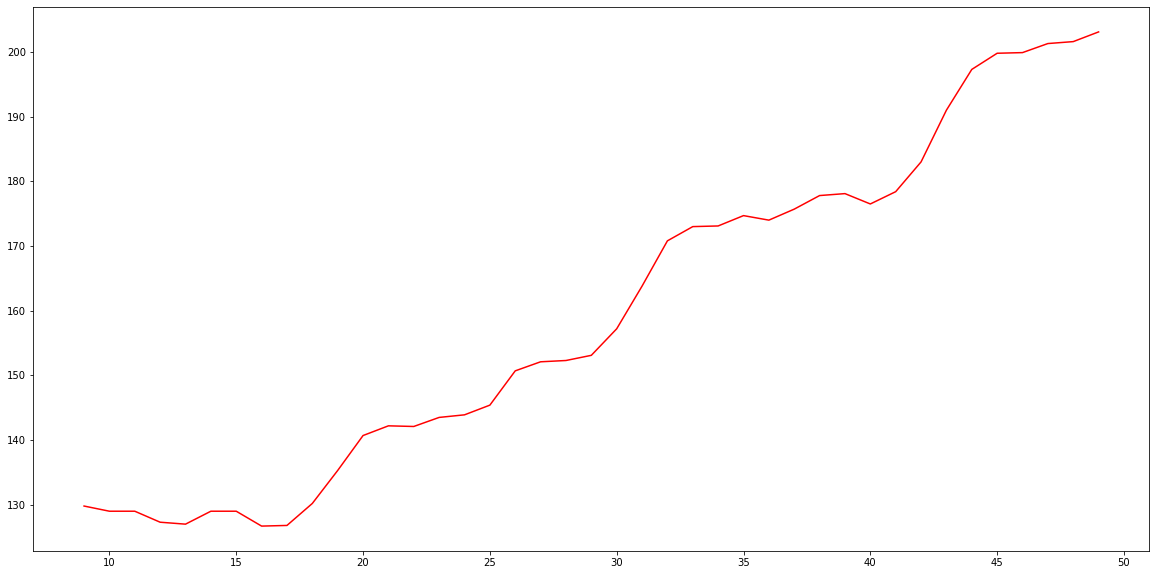

In [12]:
plt.figure(figsize=(20,10))
plt.plot(rollingmean,color = 'red')

plt.show()

# SIMPLE EXPONENTIAL SMOOTHING

In [ ]:
plt.figure(figsize=(20,10))

In [20]:
from statsmodels.tsa.api import SimpleExpSmoothing

data = airseries[['Month', 'Passengers']][:50]
data = data.set_index('Month')
fit1 = SimpleExpSmoothing(data['Passengers']).fit(smoothing_level=0.2, optimized=False)
fit2 = SimpleExpSmoothing(data['Passengers']).fit(smoothing_level=0.8, optimized=False)




/Users/shubhrasaxena/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/shubhrasaxena/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


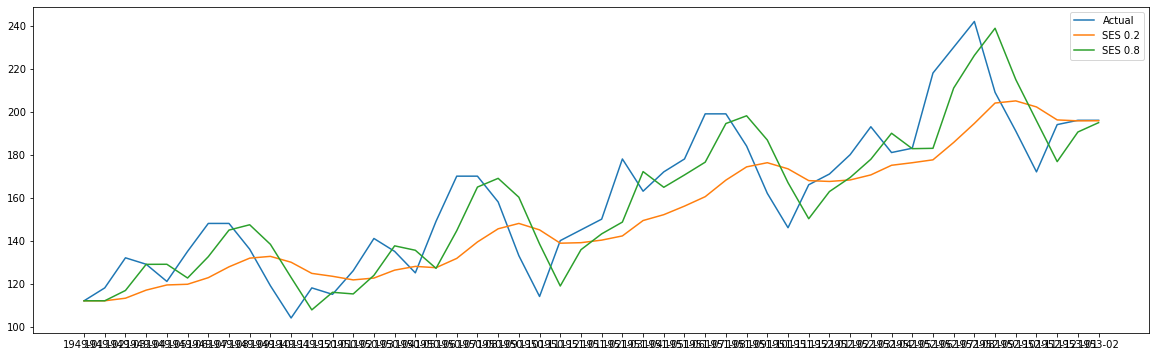

In [23]:
plt.figure(figsize=(20, 6)) # set the figure size
plt.plot(data['Passengers'], label='Actual')
plt.plot(fit1.fittedvalues, label='SES 0.2')
plt.plot(fit2.fittedvalues, label='SES 0.8')
plt.legend(loc='best')
plt.show()

# HOLT smoothing

In [37]:
# specify frequency

fit1  = Holt(data['Passengers'],exponential = False).fit() #linear trend


/Users/shubhrasaxena/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [38]:
fit2  = Holt(data['Passengers'], exponential = True).fit() #exponential trend

/Users/shubhrasaxena/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


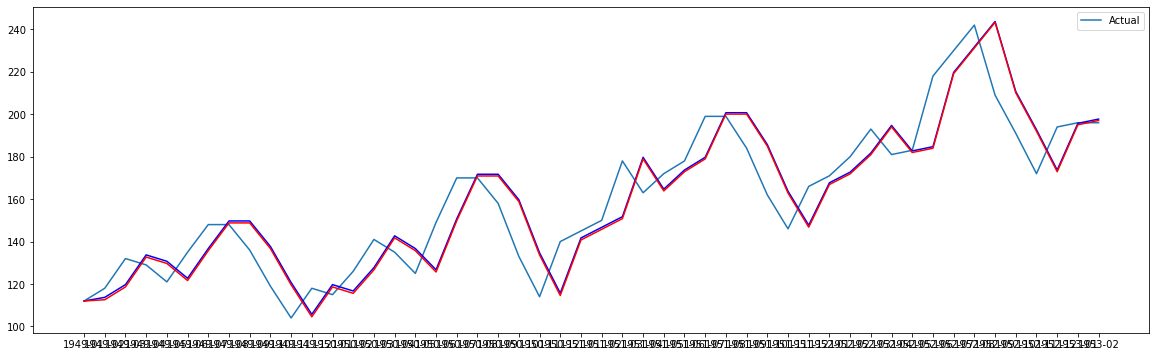

In [39]:
plt.figure(figsize=(20, 6)) # set the figure size
plt.plot(data['Passengers'], label='Actual')
plt.plot(fit1.fittedvalues,color = 'blue')
plt.plot(fit2.fittedvalues,color = 'red')
plt.legend(loc='best')
plt.show()

# AD FULLER TEST

In [48]:
#if p values is greater than 0.05 then data is non stationary
from statsmodels.tsa.stattools import adfuller

result = adfuller(airseries['Passengers'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print("Critical values:  ")
    print(f' {key}: {value}')


ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
Critical values:  
 1%: -3.4816817173418295
Critical values:  
 5%: -2.8840418343195267
Critical values:  
 10%: -2.578770059171598
